# An Introduction to Time Series Analysis

## Importing Dataset and Library

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
ts = pd.read_csv("Desktop/AirPassengers.csv",index_col='Month', parse_dates=True)

In [3]:
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
ts.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## Time Series Decomposition

The seasonal decomposition of a time series is the process of deconstructing a time series into its three components (trend,saisonal variations, cyclic variations, and random fluctuations). The modeling of the decomposed components can be either additive or multiplicative. There are different implementation such as the seasonal_decompose method from the statsmodel library.

In [5]:
len(ts)

144

The length of the dataset is 144. Since the interval of the data is monthly, the dataset contains 12 years.

In [6]:
ts.isna().sum()

#Passengers    0
dtype: int64

Since the seasonal variation fluctuates over time, we will use the multiplicative model.

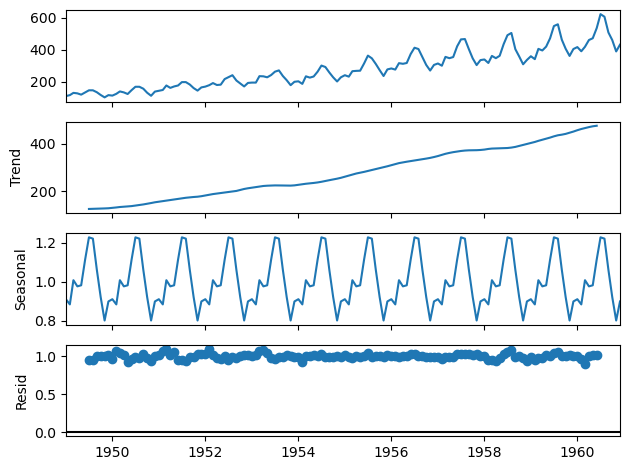

In [7]:
ts_decomposed = seasonal_decompose(ts,model='multiplicative')
ts_decomposed.plot()
pyplot.show() 

We can multiply the components to reconstruct the time series.

<Axes: xlabel='Month'>

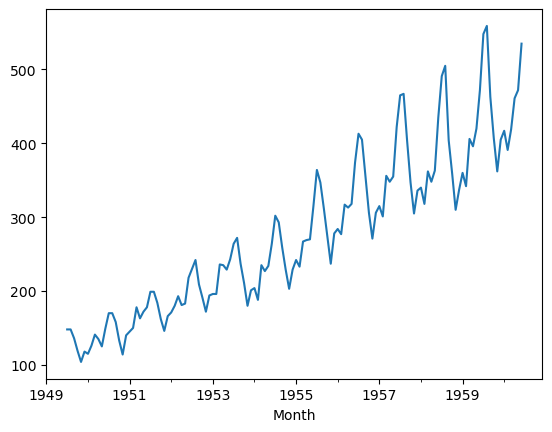

In [8]:
(ts_decomposed.trend * ts_decomposed.seasonal * ts_decomposed.resid).plot()

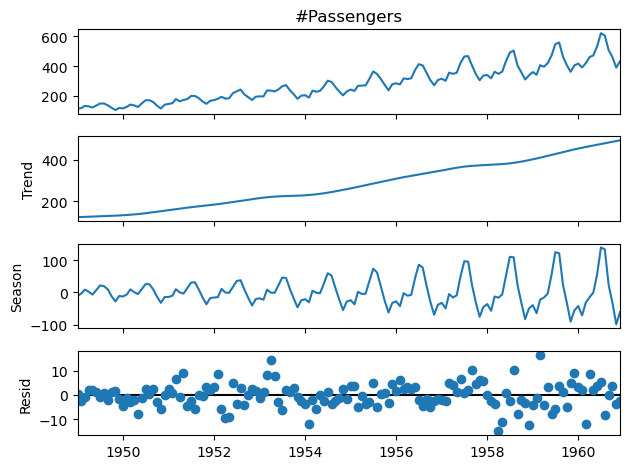

In [9]:
#Supports missing values and expects a series or dataframe with datetime index
stl = STL(ts['#Passengers'],period=12)
res_new = stl.fit()
fig = res_new.plot()

## Moving Average

<Axes: title={'center': 'Moving Average'}, xlabel='Month'>

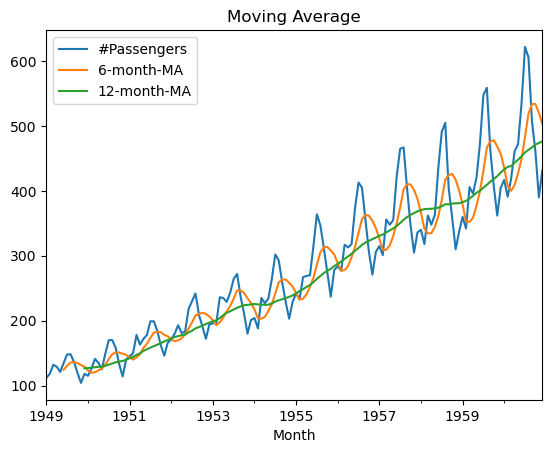

In [10]:
ts['6-month-MA'] = ts['#Passengers'].rolling(window=6).mean()
ts['12-month-MA'] = ts['#Passengers'].rolling(window=12).mean()
ts.plot(title='Moving Average')

## Augmented Dickey-Fuller Test

In [11]:
adfuller(ts['#Passengers'])

(0.8153688792060371,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)